In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Generate or load your time series data
# For demonstration purposes, let's generate a simple example
np.random.seed(0)
# Generate a random walk time series
data = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range('2020-01-01', periods=1000, freq='D'))

In [3]:
data.head(10)

2020-01-01    1.764052
2020-01-02    2.164210
2020-01-03    3.142948
2020-01-04    5.383841
2020-01-05    7.251399
2020-01-06    6.274121
2020-01-07    7.224209
2020-01-08    7.072852
2020-01-09    6.969633
2020-01-10    7.380232
Freq: D, dtype: float64

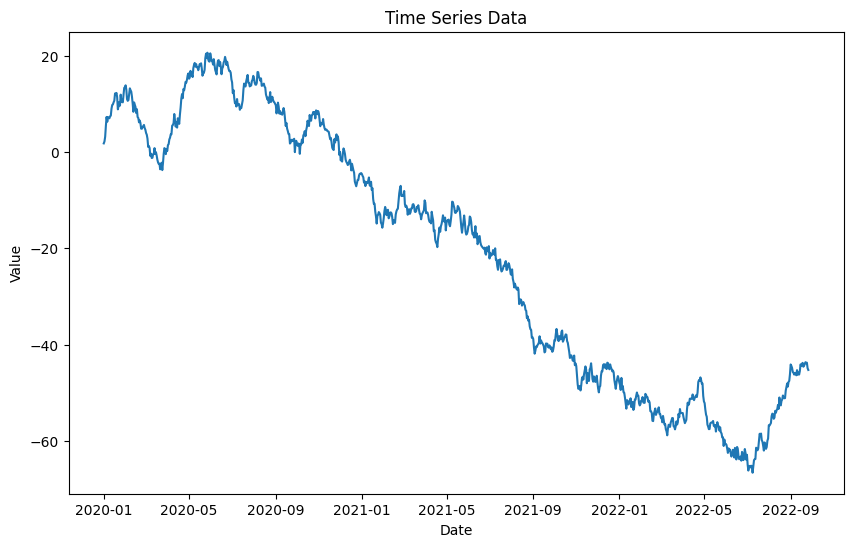

In [4]:
# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [21]:
# Fit ARIMA model
# Define the ARIMA parameters (p, d, q)
p = 5
d = 1
q = 0

# Fit ARIMA model
model = ARIMA(data, order=(p, d, q))
result = model.fit()


In [22]:
# Summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1402.299
Date:                Tue, 30 Apr 2024   AIC                           2816.597
Time:                        07:19:32   BIC                           2846.038
Sample:                    01-01-2020   HQIC                          2827.787
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0235      0.032     -0.736      0.462      -0.086       0.039
ar.L2          0.0171      0.033      0.518      0.604      -0.048       0.082
ar.L3          0.0401      0.032      1.238      0.216      -0.023       0.104
ar.L4         -0.0413      0.031     -1.334      0.182      -0.102       0.019
ar.L5         -0.0084      0.032     -0.258      0.796      -0.072       0.055
sigma2         0.9700      0.045     21.542      0.000       0.882       1.058
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.94   Prob(JB):                         0.76
Heteroskedasticity (H):               0.99   Skew:                             0.03
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

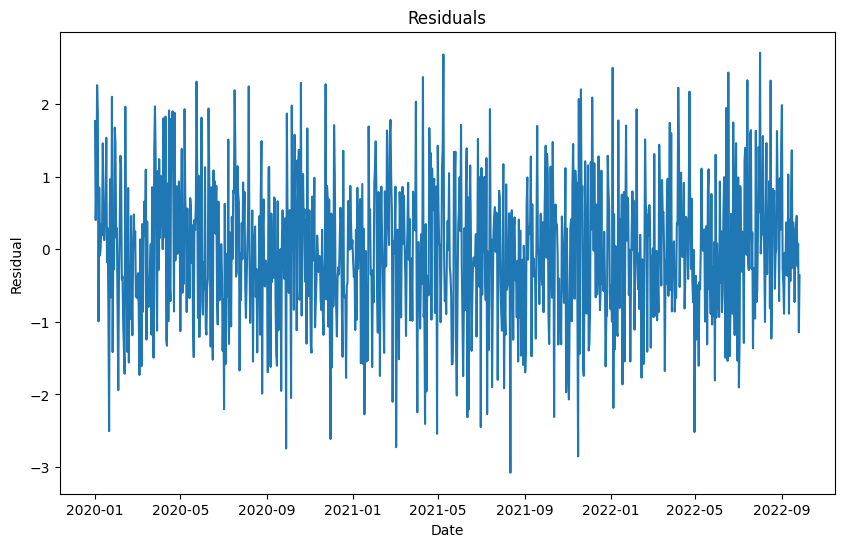

In [23]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

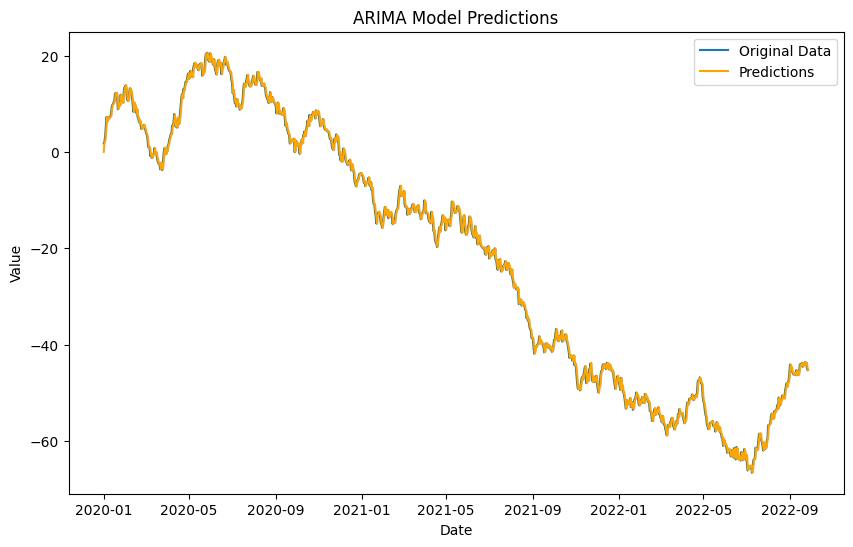

In [24]:
# Plot predictions
plt.figure(figsize=(10,6))
plt.plot(data, label='Original Data')
plt.plot(result.predict(start=0, end=len(data)), color='orange', label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()